In [1]:
#add your code 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/train_3.csv')

In [3]:
df.head()

,Tweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Sentiment'] = encoder.fit_transform(df['Sentiment'])

In [6]:
pip install transformers

     |████████████████████████████████| 3.5 MB 5.2 MB/s 
     |████████████████████████████████| 67 kB 4.0 MB/s 
     |████████████████████████████████| 895 kB 53.6 MB/s 
     |████████████████████████████████| 596 kB 55.1 MB/s 
     |████████████████████████████████| 6.8 MB 36.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [7]:
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [9]:
# Reduce logging output.
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(df.Tweet.values)

In [11]:
 message_embeddings

<tf.Tensor: shape=(3798, 512), dtype=float32, numpy=
array([[ 0.03464017,  0.01946312, -0.0556098 , ...,  0.03735727,
        -0.0573028 , -0.03065176],
       [ 0.01481251,  0.00384446, -0.01779516, ...,  0.05216905,
         0.04077005,  0.01872287],
       [-0.02235303, -0.0175385 , -0.00499455, ...,  0.07309585,
         0.03072226, -0.0021904 ],
       ...,
       [ 0.04208784, -0.03760989,  0.03104785, ..., -0.04210487,
        -0.00854898, -0.02110994],
       [-0.01530381, -0.03143806,  0.01304347, ...,  0.01240609,
        -0.0517155 , -0.09033211],
       [-0.03057546,  0.04485456,  0.00291918, ...,  0.06015959,
        -0.03234624,  0.02479382]], dtype=float32)>

In [12]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(message_embeddings)
clusters = km.labels_.tolist()

In [13]:
from sklearn.decomposition import PCA
import numpy as np

data = message_embeddings

pca = PCA(3)
 
#Transform the received data
df_new = pca.fit_transform(data)

In [14]:
#Initialize the class object
kmeans = KMeans(n_clusters=5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df_new)
 
#Getting unique labels
u_labels = np.unique(label)
 
labels = kmeans.labels_

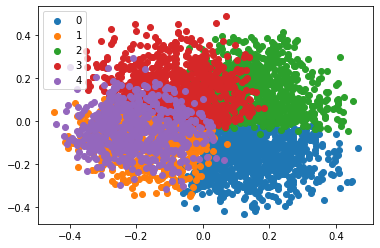

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plotting the results:
for i in u_labels:
    plt.scatter(df_new[label == i , 0] , df_new[label == i , 1] , label = i)
plt.legend()
plt.show()